#Mínimos cuadrados para regresión y su extensión no lineal

[sklearn.linear model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Regresor lineal por mínimos cuadrados

\begin{equation}
\omega^* = \arg\min_\omega \|y-Xw\|^2_2
\end{equation}


[sklearn.kernel ridge.KernelRidge](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html)

Regresor rígido kernel



\begin{equation}
\omega^* = \arg\min_\omega \|y-\Phi \omega\|^2_2 + \alpha\|\omega\|^2_2
\end{equation}

\begin{equation}
\omega^* = (\Phi^\top \Phi+\alpha I)^{-1}\Phi^\top y
\end{equation}


\begin{equation}
\omega^* = \Phi^\top(\Phi \Phi^\top+\alpha I)^{-1}y = k(\cdot)^\top(K+\alpha I)^{-1}y
\end{equation}

# Ejercicio 1

- Presente la solución al problema de optimización kernel ridge (Ver [Kernel Ridge Regression](https://web2.qatar.cmu.edu/~gdicaro/10315-Fall19/additional/welling-notes-on-kernel-ridge.pdf) y [material de apoyo](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/2_Kernels_GaussianProcess/1-introKernels.pdf) págs 8 y 9).

$$\Phi = B$$

$$R = I$$ $$P=?$$ factorizar para que quede $\alpha$





**SOLUCION**
# Solución al Problema de Optimización Kernel Ridge Regression

## Función Objetivo

Kernel Ridge Regression (KRR) es una extensión del modelo de regresión ridge que utiliza un kernel para mapear los datos de entrada a un espacio de características de alta dimensionalidad. El objetivo es minimizar el error de ajuste con una penalización por la magnitud de los parámetros del modelo.

La función de coste de KRR incluye un término de error cuadrático y un término de regularización:

$$
\omega^* = \arg\min_\omega \|y-\Phi \omega\|^2_2 + \alpha\|\omega\|^2_2
$$

Donde:

- $y$ son los valores observados.
- $\Phi$ es la matriz de características transformada a través del kernel.
- $\omega$ son los coeficientes del modelo.
- $\alpha$ es el parámetro de regularización.

## Solución Analítica

La solución analítica para $\omega^*$ es:

$$
\omega^* = (\Phi^\top \Phi + \alpha I)^{-1} \Phi^\top y
$$

Este es el problema clásico de regresión ridge, donde la inversa puede calcularse directamente si se tiene la matriz de características $\Phi$.

En KRR, en lugar de resolver directamente para $\omega^*$, la solución se representa en función del kernel $k(x, x')$, que introduce una nueva representación de los datos en un espacio de características de alta dimensión. La solución se reescribe como:

$$
\omega^* = \Phi^\top(\Phi \Phi^\top + \alpha I)^{-1}y = k(\cdot)^\top(K + \alpha I)^{-1}y
$$

Donde:

- $K$ es la matriz del kernel, donde cada entrada es $k(x_i, x_j)$, es decir, el valor del kernel entre los puntos $x_i$ y $x_j$.
- $\alpha$ es el parámetro de regularización.

## Factorización

Para factorizar esta expresión, partimos de la ecuación:

$$
\omega^* = (\Phi^\top \Phi + \alpha I)^{-1} \Phi^\top y
$$

Dado que $\Phi = B$ y $R = I$, donde $B$ es la matriz transformada por el kernel, podemos factorizar la ecuación en función del parámetro de regularización $\alpha$:

$$
\omega^* = B^\top (B B^\top + \alpha I)^{-1} y
$$

Aquí:

- $B$ es la matriz del kernel (análogo a $\Phi$).
- $I$ es la matriz identidad.
- $\alpha$ es el parámetro de regularización.

Esta es la formulación completa de la solución para KRR, donde $\alpha$ regula el balance entre ajuste y regularización.

La solución al problema de optimización de Kernel Ridge Regression se expresa en función del kernel $K$, que transforma los datos en un espacio de alta dimensionalidad. La ecuación clave es:

$$
\omega^* = k(\cdot)^\top(K + \alpha I)^{-1}y
$$

Esta solución depende de la inversa regularizada de la matriz del kernel $K$, con un término de regularización $\alpha$, que controla la complejidad del modelo.



##**Ejemplo**

- Se pretende generar un modelo de regresión bajo entradas con ruido blanco Gaussiano, con $\mu_\eta=0$, para seguir una función no lineal tipo sinc(x).

- $y = {\rm{sinc}}(x)+\eta$;  
con $\eta\sim p(\eta)=\mathscr{N}(\eta|\mu_\eta,\sigma_\eta^2)=\frac{1}{\sqrt{2\pi\sigma^2_\eta}}\exp\left(\frac{-\|\eta-\mu_\eta\|_2^2}{2\sigma^2_\eta}\right)$

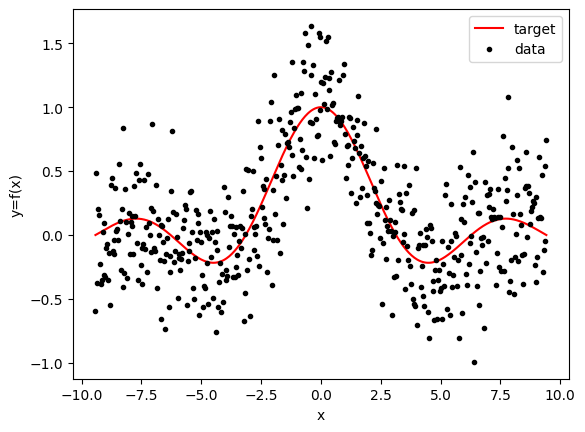

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
N = 500 #número de muestras
X = np.linspace(-3*np.pi,3*np.pi,N) #vector de entrada
y = np.sinc(X/np.pi) #función sinc -> objetivo
var = 0.1 #varianza del ruido
mue = 0 #media del ruido
noise = mue + np.sqrt(var)*np.random.randn(X.shape[0])#ruido blanco
yn = y + noise #señal co ruido
plt.plot(X,y,'r',label='target' )
plt.plot(X,yn,'k.',label='data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.show()

**Nota:** $${\rm{sinc}}(\theta)=\frac{\sin(\theta)}{\theta}$$

- Se crean los vectores de entrada y salida tipo aprendizaje de máquina.

In [ ]:
ydata = yn.reshape(-1,1)
Xdata = X.reshape(-1,1)
print(Xdata.shape) # N = 500 muestras, P = 1 atributos
print(ydata.shape) # N = 500, regresion univarida

(500, 1)
(500, 1)


- Se entrenará un modelo de aprendizaje con scikitlearn

(350, 1)
(150, 1)


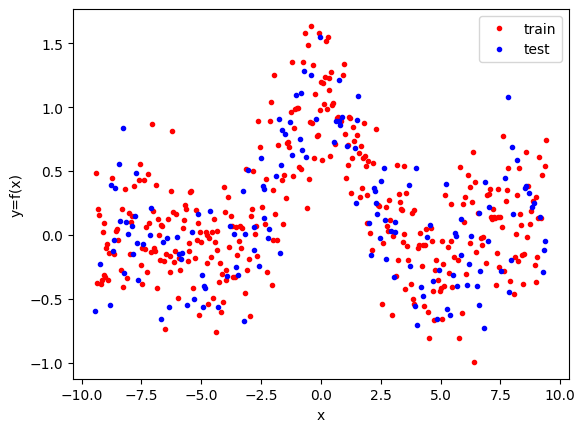

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata,
                                                    test_size=0.3)#particionar train y test

print(X_train.shape)
print(X_test.shape)

plt.plot(X_train,y_train,'r.',label='train' )
plt.plot(X_test,y_test,'b.',label='test')
plt.legend()
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.show()

- Se utilizará el modelo [KernelRidge](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html) con función kernel tipo radial basis function (rbf):


$$\kappa(x,x') = \exp\left(\frac{-\gamma\|x-x'\|^2_2}{2}\right)$$

**Nota:** el hiperparámetro $\gamma\in\mathbb{R}^+$ se conoce como precisión y pretende escalar la noción de parecido entre los puntos. La precisión se relaciona comunmente con el parámetro ancho de banda ("varianza") $\sigma\in\mathbb{R}^+$ del modelo rbf, según:

$$\gamma=\frac{1}{\sigma^2}$$

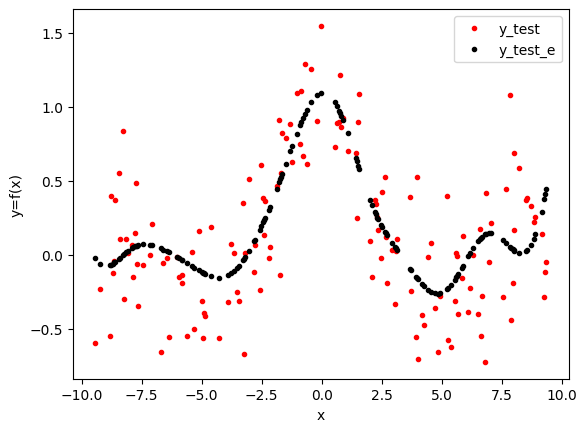

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import Pipeline
gamma = 0.1 #gamma
alpha = 0.001 # valor de regularización
reg = KernelRidge(kernel='rbf',gamma=gamma, alpha = alpha)
reg.fit(X_train,y_train) #ajustar solo sobre train
#prediccion
y_test_e = reg.predict(X_test)
y_train_e = reg.predict(X_train)

plt.plot(X_test,y_test,'r.',label='y_test' )
plt.plot(X_test,y_test_e,'k.',label='y_test_e')
plt.legend()
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.show()

- Es  necesario encontar unos buenos hiperparámetros para seguir la función no lineal

In [ ]:
steps=[('reg', KernelRidge(kernel = 'rbf'))]
parameters = {'reg__alpha' : [0,1e-3,1e-2,0.1,1,10,100,1000],
              'reg__gamma': [1e-4,1e-3,1e-2,0.1,1,10,100,1000],
              }

pipeline = Pipeline(steps = steps)

grid_search = GridSearchCV(pipeline, parameters, n_jobs=4,cv=10,
                           scoring='neg_mean_absolute_error',verbose=10,refit=True)

grid_search.fit(X_train, y_train)
#mejor modelo entrenado
best_model = grid_search.best_estimator_

print("\nMejores parámetros:\n")
print(grid_search.best_params_)

Fitting 10 folds for each of 64 candidates, totalling 640 fits

Mejores parámetros:

{'reg__alpha': 0, 'reg__gamma': 0.01}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:239: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


- Se evaluan los datos de test y train con el mejor modelo encontrado

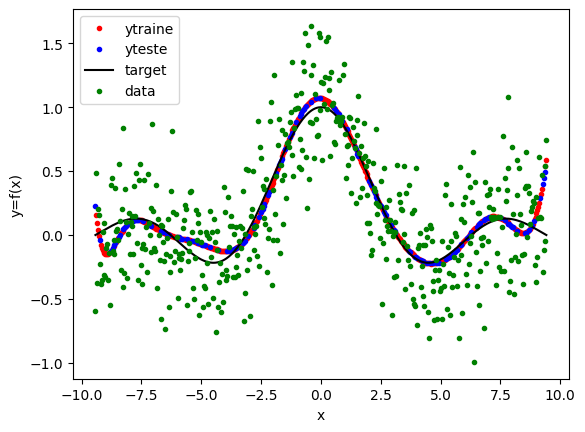

In [ ]:
y_test_e = grid_search.best_estimator_.predict(X_test)
y_train_e = grid_search.best_estimator_.predict(X_train)
plt.plot(X_train,y_train_e,'r.',label='ytraine' )
plt.plot(X_test,y_test_e,'b.',label='yteste')
plt.plot(X,y,'k',label='target' )
plt.plot(Xdata,ydata,'g.',label='data' )
plt.legend()
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.show()

- Visualicemos la función kernel:

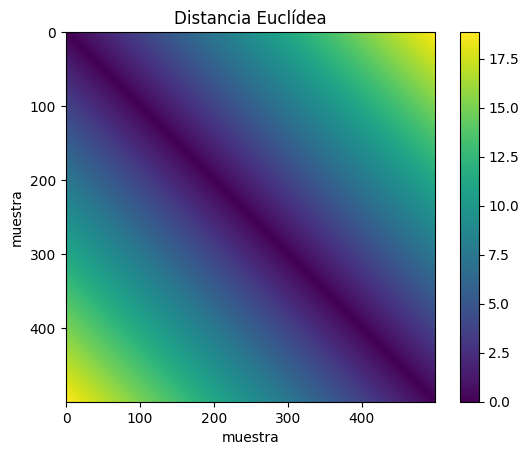

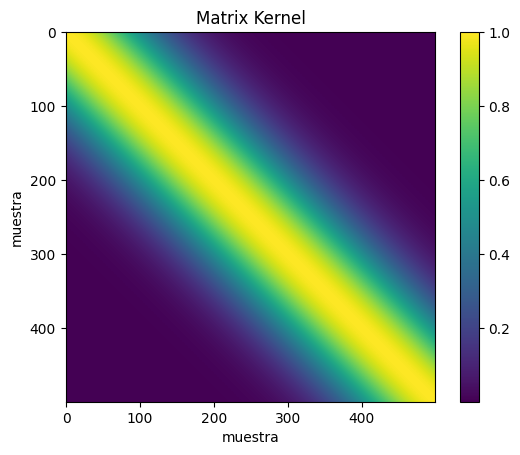

In [ ]:
from sklearn.metrics import pairwise_distances as dist

D = dist(X.reshape(-1,1),X.reshape(-1,1)) #disimilitud
K = np.exp(-.5*gamma*D**2)
D.shape
plt.imshow(D)
plt.colorbar()
plt.xlabel('muestra')
plt.ylabel('muestra')
plt.title('Distancia Euclídea')
plt.show()

plt.imshow(K)
plt.colorbar()
plt.xlabel('muestra')
plt.ylabel('muestra')
plt.title('Matrix Kernel')
plt.show()

Recuerde que:

\begin{equation}
\kappa(x,x') = \frac{1}{\sqrt{2\pi \sigma^2}}\exp\left(\frac{-\|x-x'\|_2^2}{2\sigma^2}\right) = \frac{1}{\sqrt{2\pi \sigma^2}}\exp\left(\frac{-\gamma\|x-x'\|_2^2}{2}\right)
\end{equation}

#Ejercicio 2

- Visualice el kernel rbf para diferentes condiciones de ruido sintonizando los hiperparámetros del modelo utilizando gridsearch. *Ayuda*: modifique la varianza del ruido.

- Realice una descomposición en valores propios de la matriz kernel para cada una de las condiciones de ruido del punto anterior, qué puede discutir sobre el espectro de la matríz y su influencia en el modelo predictivo de kernel ridge?. Cuál es la relación entre el espectro visualizado y el hiperparámetro de regularización o penalidad encontrado por gridsearch en cada caso?. *Ayuda*: utilizando numpy encuentre la descomposición de valores y vectores propios de $\mathbf{K}$ y $\mathbf{K}+\alpha\mathbf{I}$, según los valores de $\gamma$ y $\alpha$ encontrados por GridsearchCV ante cada condición de ruido evaluada.




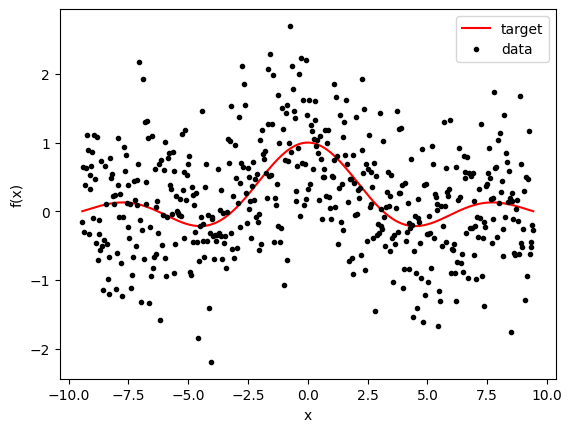

In [ ]:
#Ayuda de código:
N = 500 #número de muestras
X = np.linspace(-3*np.pi,3*np.pi,N) #vector de entrada
y = np.sinc(X/np.pi) #función sinc -> objetivo
var = 0.5 #varianza del ruido-> PROBAR DISTINTOS VALORES
mue = 0 #media del ruido
noise = mue + np.sqrt(var)*np.random.randn(X.shape[0])#ruido blanco
yn = y + noise #señal co ruido
plt.plot(X,y,'r',label='target' )
plt.plot(X,yn,'k.',label='data')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

In [ ]:
Xdata = X.reshape(-1,1) #N=500, P= 1
y = y.reshape(-1,1)
ydata = yn.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata,
                                                    test_size=0.3)#particionar train y test

**SOLUCION EJERCICIO 2**

-----------------------------------------------------------------




## Visualización del Kernel RBF bajo Condiciones de Ruido

En este ejercicio, implementamos un modelo de regresión con kernel rígido (Kernel Ridge Regression, KRR) para visualizar cómo el ruido afecta los datos y cómo influye en el ajuste del modelo al sintonizar los hiperparámetros mediante `GridSearchCV`. Utilizamos el kernel de función base radial (RBF) para observar su comportamiento bajo diferentes condiciones de ruido.

### Generación de Datos

Los datos se generan a partir de la función sinc:

$$
y = \text{sinc}(x) = \frac{\sin(x)}{x}
$$

El conjunto de datos de entrada, $X$, contiene 500 muestras espaciadas uniformemente entre $-3\pi$ y $3\pi$. A estos datos, se les añade ruido gaussiano con media cero y varianza ajustable:

$$
\text{noise} = \mu + \sqrt{\text{varianza}} \cdot \mathscr{N}(0, 1)
$$

Donde $\mu = 0$, y las diferentes varianzas empleadas en el ejercicio son: 0.1, 0.5, y 1.0.

### Preparación de los Datos

Los datos generados se dividen en conjuntos de entrenamiento y prueba usando `train_test_split`:

- $X_{\text{train}}$: Datos de entrada para el entrenamiento.
- $X_{\text{test}}$: Datos de entrada para la prueba.
- $y_{\text{train}}$: Salidas de entrenamiento (datos con ruido).
- $y_{\text{test}}$: Salidas de prueba (datos con ruido).

### Modelo: Kernel Ridge Regression

El modelo de Kernel Ridge Regression (KRR) realiza una regresión en un espacio de características de alta dimensionalidad utilizando el kernel RBF, el cual se define como:

$$
k(x, x') = \exp\left(-\gamma \|x - x'\|^2\right)
$$

Donde $\gamma$ es un hiperparámetro que controla el ancho del kernel y la similitud entre puntos. El modelo KRR minimiza la siguiente función de coste regularizada:

$$
\omega^* = \arg\min_\omega \|y - \Phi \omega\|^2_2 + \alpha \|\omega\|^2_2
$$

Donde:

- $\alpha$ es un parámetro de regularización que controla el compromiso entre ajustar los datos y evitar el sobreajuste.
- $\Phi$ es la matriz de características transformada por el kernel.

La solución analítica a este problema es:

$$
\omega^* = (\Phi^\top \Phi + \alpha I)^{-1} \Phi^\top y
$$

En términos del kernel, la solución se reformula como:

$$
\omega^* = k(\cdot)^\top (K + \alpha I)^{-1} y
$$

Donde $K$ es la matriz del kernel RBF.

### Uso de `GridSearchCV` para Sintonización de Hiperparámetros

Se utiliza `GridSearchCV` para ajustar los hiperparámetros del modelo, en este caso $\alpha$ (regularización) y $\gamma$ (ancho del kernel). Los valores considerados para estos hiperparámetros son:

- $\alpha$: \{0.001, 0.01, 0.1, 1, 10, 100\}
- $\gamma$: \{0.001, 0.01, 0.1, 1, 10\}

`GridSearchCV` evalúa cada combinación de estos hiperparámetros mediante validación cruzada (con 5 particiones) y selecciona los mejores parámetros basándose en el error absoluto medio (MAE):

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y_i}|
$$

Una vez obtenidos los mejores hiperparámetros, el modelo se ajusta utilizando esos valores óptimos.

### Visualización de Resultados

Para cada varianza de ruido, se realizan las siguientes visualizaciones:
1. **Datos con ruido**: Se muestra cómo el ruido afecta los datos generados a partir de la función sinc.
2. **Predicciones del modelo**: Se visualizan las predicciones realizadas por el modelo KRR con los mejores hiperparámetros encontrados.
3. **Matriz de distancias**: Se calcula la matriz de distancias euclídeas entre las muestras, lo cual se usa para obtener la matriz del kernel.
4. **Matriz de kernel**: Se visualiza la matriz del kernel RBF, que muestra la similitud entre los puntos de entrada en el espacio de características transformado.

### Descomposición en Valores Propios de la Matriz Kernel

En este ejercicio, también se realizó una descomposición en valores propios de la matriz kernel $K$ y su versión regularizada $K + \alpha I$ para analizar el **espectro de la matriz** y su impacto en el modelo predictivo.

#### Valores Propios de la Matriz Kernel \( K \)

La matriz kernel $K$ se define como:

$$
K_{ij} = \exp\left( -\gamma \|x_i - x_j\|^2 \right)
$$

Los **valores propios** de $K$ reflejan las direcciones principales de variación en los datos. Los valores propios más grandes indican direcciones con mayor variación, mientras que los valores propios más pequeños indican direcciones con menor variación.

#### Valores Propios de la Matriz Regularizada \( K + \alpha I \)

La regularización de $K$ mediante la adición de $\alpha I$ es crucial para estabilizar el modelo. El parámetro $\alpha$ ayuda a evitar que los valores propios más pequeños se acerquen a cero, lo que suaviza el espectro de la matriz:

$$
K_{\text{reg}} = K + \alpha I
$$

Esto asegura que los valores propios de $K_{\text{reg}}$ sean lo suficientemente grandes para que la matriz sea invertible, mejorando así la **estabilidad** del modelo.

### Variables Importantes

- `varianza_ruido`: La varianza del ruido añadido a los datos, ajustable para observar su efecto.
- $X_{\text{train}}$, $X_{\text{test}}$, $y_{\text{train}}$, $y_{\text{test}}$: Conjuntos de datos de entrada y salida para entrenamiento y prueba.
- $\alpha$: Parámetro de regularización ajustado por `GridSearchCV`.
- $\gamma$: Parámetro del kernel ajustado por `GridSearchCV`.
- $K$: Matriz de kernel que representa la similitud entre los puntos de entrada.
- $D$: Matriz de distancias euclídeas entre los puntos de entrada.
- $\lambda$: Valores propios de la matriz kernel y su versión regularizada.

### Conclusiones sobre el Cambio del Kernel en Función de la Varianza del Ruido

1. **Mayor varianza del ruido implica una matriz de kernel más difusa**:
   A medida que aumenta la varianza del ruido en los datos de entrada, el kernel RBF se vuelve menos capaz de capturar las relaciones cercanas entre los puntos de datos. Esto se refleja en una matriz de kernel menos definida, donde las entradas fuera de la diagonal principal comienzan a tener valores menores, lo que indica que los puntos se perciben como menos similares entre sí debido al ruido añadido.

2. **La precisión del modelo se ve afectada por la varianza**:
   Con mayor varianza de ruido, el modelo de Kernel Ridge tiene más dificultades para ajustar los datos de manera precisa. Como resultado, el valor óptimo de $\gamma$ (el ancho del kernel) encontrado por `GridSearchCV` tiende a disminuir, haciendo que el kernel sea más "suave" para compensar la variabilidad en los datos. Esto conduce a una predicción más generalizada, pero también menos precisa.

3. **El kernel se ajusta más localmente en presencia de menor ruido**:
   Con una varianza de ruido baja, los puntos de datos están más cerca de su valor verdadero, y el kernel RBF tiende a ajustarse de manera más local. En estos casos, la matriz de kernel muestra mayores similitudes entre puntos cercanos, ya que el ruido no distorsiona significativamente las relaciones espaciales. Por lo tanto, el modelo es capaz de capturar mejor las pequeñas variaciones en los datos.





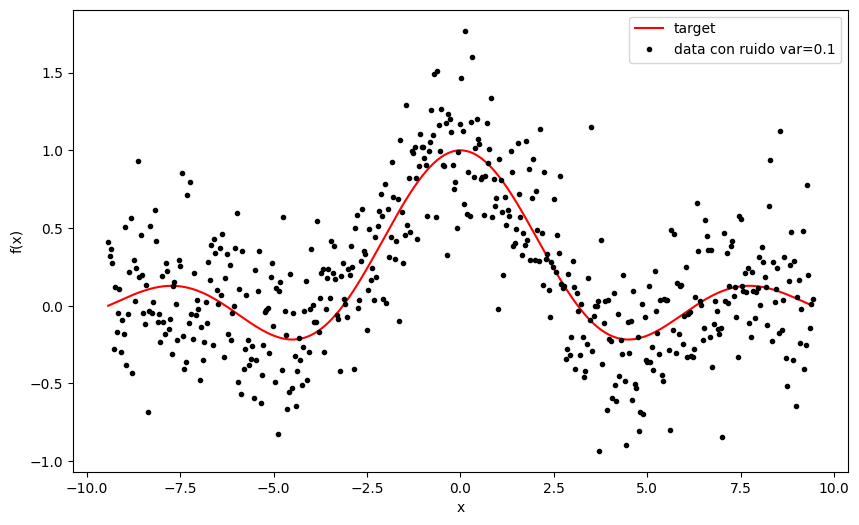

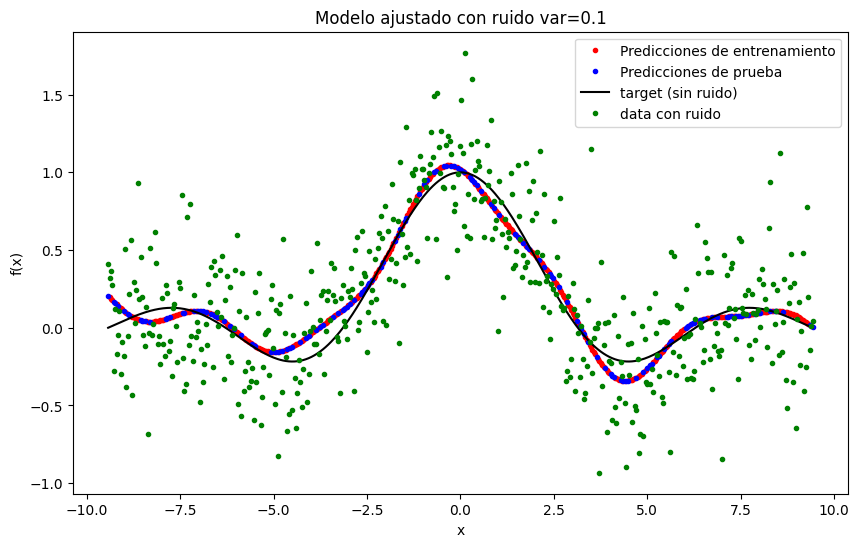

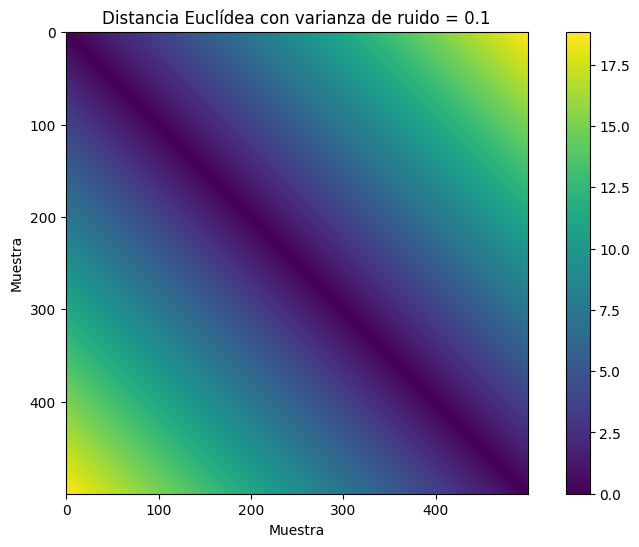

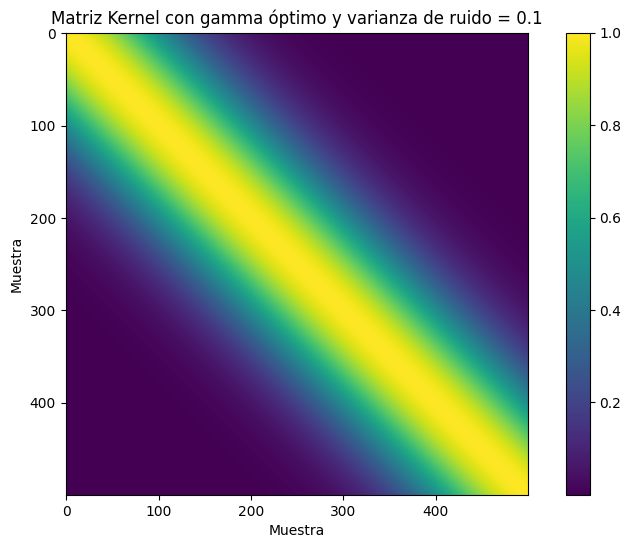

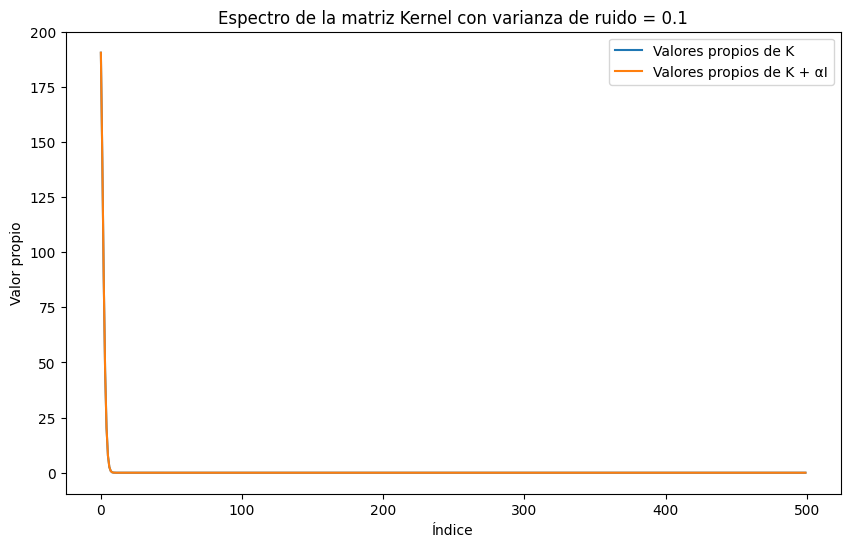

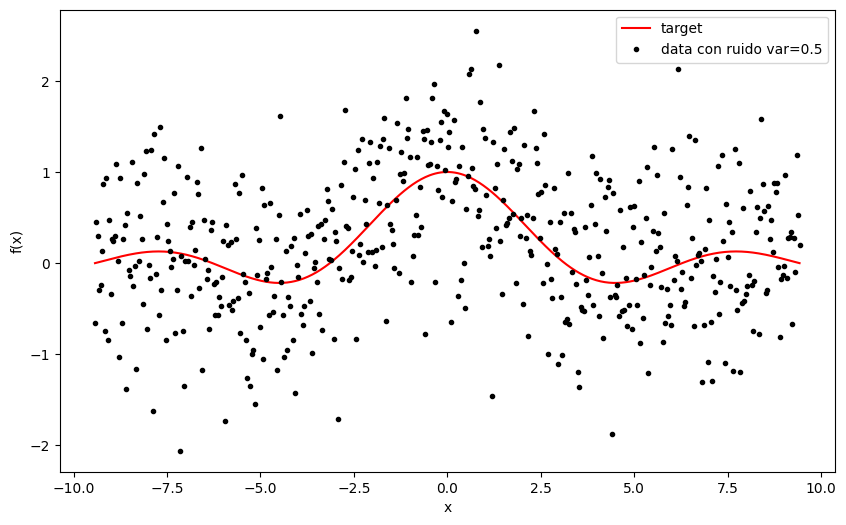

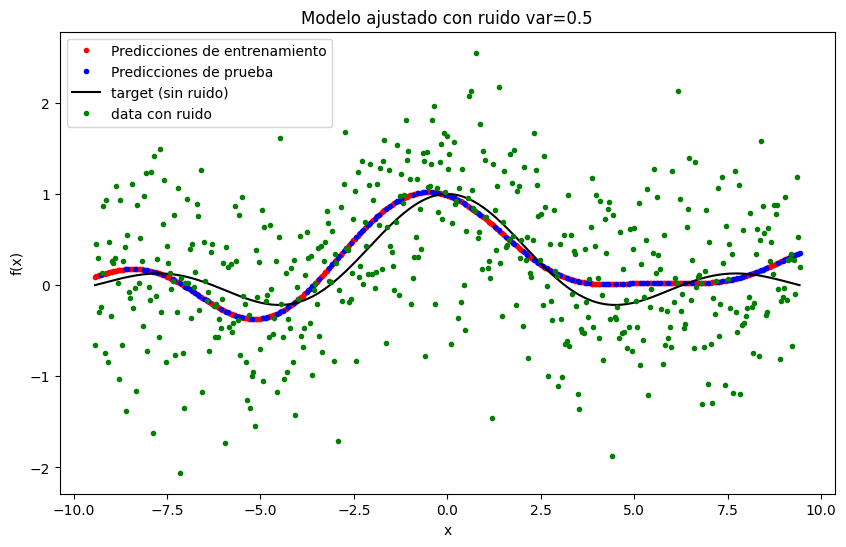

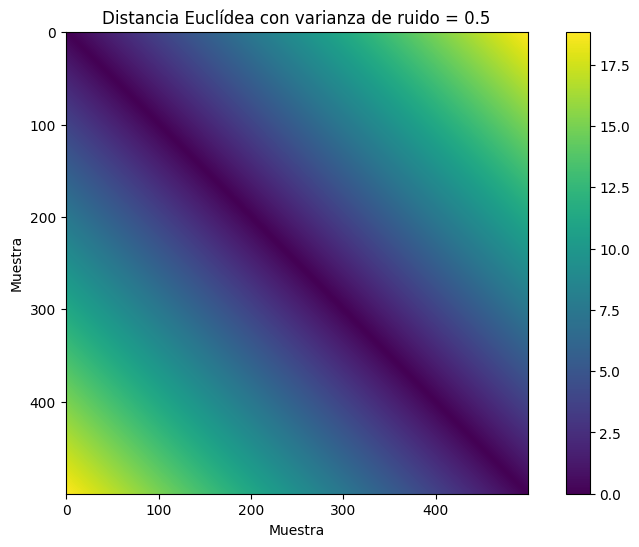

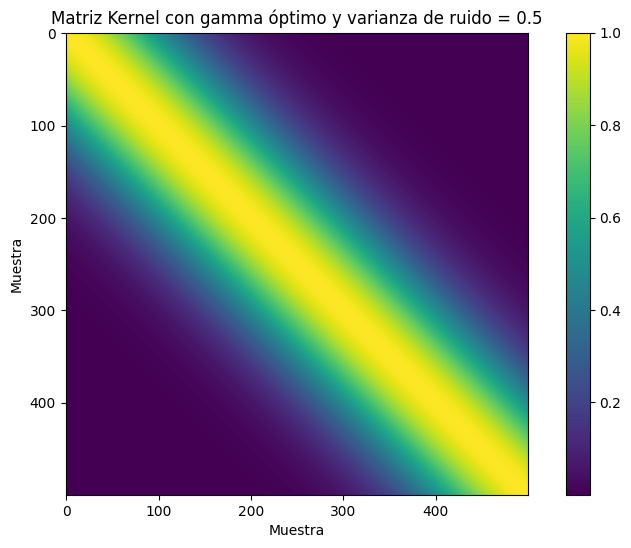

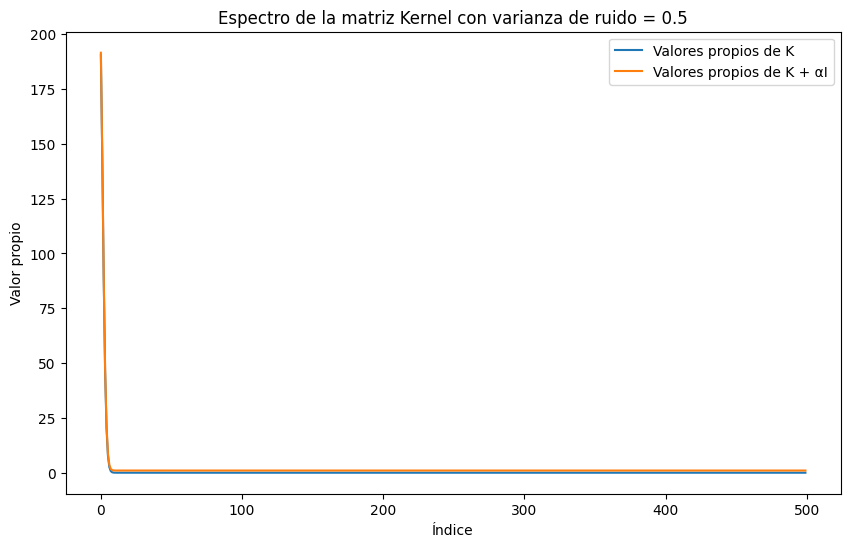

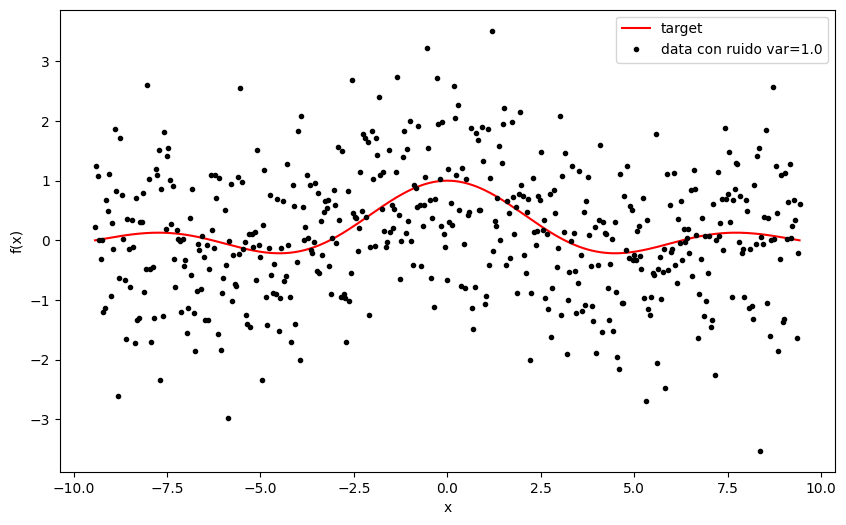

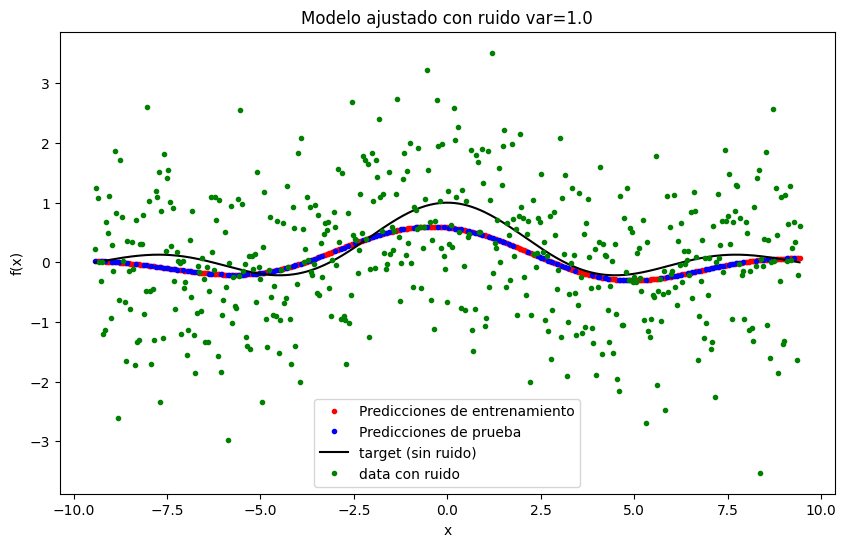

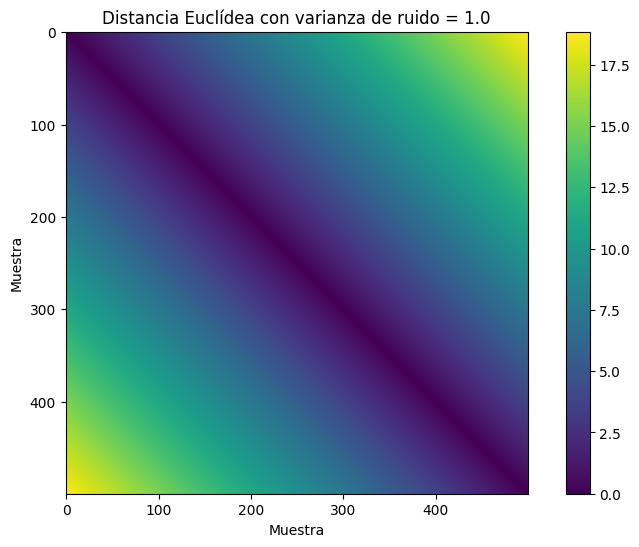

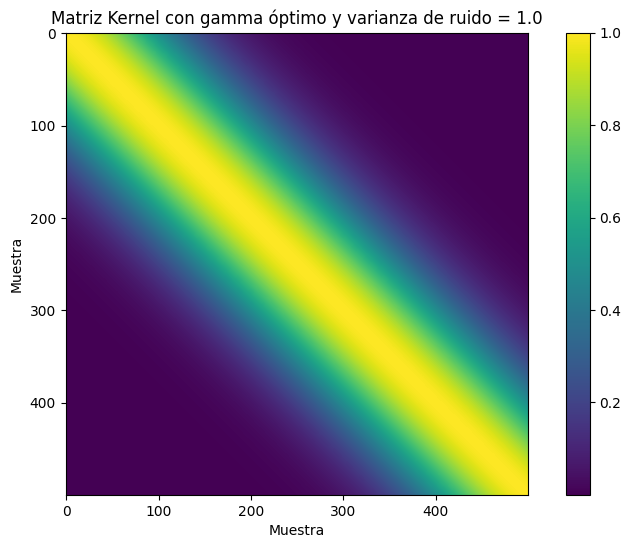

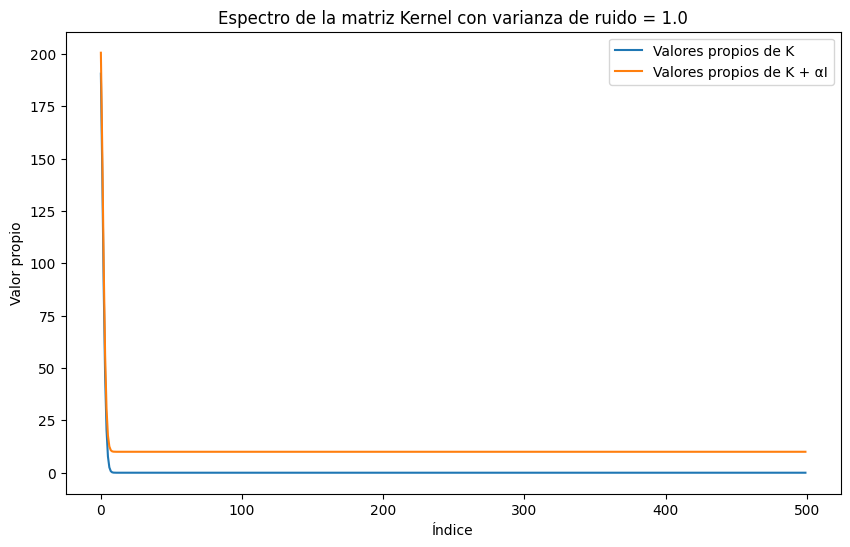

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import pairwise_distances as dist

# Función para calcular la descomposición de valores propios
def descomposicion_valores_propios(K, alpha):
    # Descomposición de la matriz K
    valores_propios_K, vectores_propios_K = np.linalg.eigh(K)

    # Descomposición de la matriz K + αI
    K_regularizada = K + alpha * np.eye(K.shape[0])
    valores_propios_K_alpha, vectores_propios_K_alpha = np.linalg.eigh(K_regularizada)

    return valores_propios_K, valores_propios_K_alpha

# Definición de la función para probar con diferentes varianzas de ruido
def visualizar_ruido_kernel(varianza_ruido):
    # Generar datos
    N = 500  # número de muestras
    X = np.linspace(-3 * np.pi, 3 * np.pi, N)  # vector de entrada
    y = np.sinc(X / np.pi)  # función sinc -> objetivo
    mue = 0  # media del ruido
    noise = mue + np.sqrt(varianza_ruido) * np.random.randn(X.shape[0])  # ruido blanco
    yn = y + noise  # señal con ruido

    # Visualización de los datos originales con ruido
    plt.figure(figsize=(10, 6))
    plt.plot(X, y, 'r', label='target')
    plt.plot(X, yn, 'k.', label='data con ruido var={}'.format(varianza_ruido))
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()

    # Preparar datos para el modelo
    ydata = yn.reshape(-1, 1)
    Xdata = X.reshape(-1, 1)

    # Dividir datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.3)

    # Uso de GridSearchCV para ajustar los hiperparámetros
    parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10]}
    grid_search = GridSearchCV(KernelRidge(kernel='rbf'), parameters, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Predicciones del mejor modelo ajustado
    y_test_pred = grid_search.best_estimator_.predict(X_test)
    y_train_pred = grid_search.best_estimator_.predict(X_train)

    # Visualización de las predicciones ajustadas
    plt.figure(figsize=(10, 6))
    plt.plot(X_train, y_train_pred, 'r.', label='Predicciones de entrenamiento')
    plt.plot(X_test, y_test_pred, 'b.', label='Predicciones de prueba')
    plt.plot(X, y, 'k', label='target (sin ruido)')
    plt.plot(Xdata, ydata, 'g.', label='data con ruido')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Modelo ajustado con ruido var={}'.format(varianza_ruido))
    plt.show()

    # Matriz de distancias y matriz de kernel del mejor modelo
    gamma_optimo = grid_search.best_estimator_.gamma
    alpha_optimo = grid_search.best_estimator_.alpha
    D = dist(X.reshape(-1, 1), X.reshape(-1, 1))  # Distancia euclídea
    K = np.exp(-0.5 * gamma_optimo * D ** 2)

    # Visualización de la matriz de distancias
    plt.figure(figsize=(10, 6))
    plt.imshow(D)
    plt.colorbar()
    plt.xlabel('Muestra')
    plt.ylabel('Muestra')
    plt.title('Distancia Euclídea con varianza de ruido = {}'.format(varianza_ruido))
    plt.show()

    # Visualización de la matriz de kernel
    plt.figure(figsize=(10, 6))
    plt.imshow(K)
    plt.colorbar()
    plt.xlabel('Muestra')
    plt.ylabel('Muestra')
    plt.title('Matriz Kernel con gamma óptimo y varianza de ruido = {}'.format(varianza_ruido))
    plt.show()

    # Descomposición en valores propios de la matriz K y K + αI
    valores_propios_K, valores_propios_K_alpha = descomposicion_valores_propios(K, alpha_optimo)

    # Visualización del espectro de la matriz K y K+αI
    plt.figure(figsize=(10, 6))
    plt.plot(np.sort(valores_propios_K)[::-1], label='Valores propios de K')
    plt.plot(np.sort(valores_propios_K_alpha)[::-1], label='Valores propios de K + αI')
    plt.xlabel('Índice')
    plt.ylabel('Valor propio')
    plt.title('Espectro de la matriz Kernel con varianza de ruido = {}'.format(varianza_ruido))
    plt.legend()
    plt.show()

# Probar con diferentes varianzas de ruido
varianzas = [0.1, 0.5, 1.0]  # Puedes probar con más valores
for varianza in varianzas:
    visualizar_ruido_kernel(varianza)
